<a href="https://colab.research.google.com/github/HiteshPolavarapu/Plant-Leaf-Disease-Detection-System/blob/main/Plant_Leaf_Disease_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

# Update this path to where the file is located in your Google Drive
zip_path = '/content/drive/MyDrive/plant_disease/Plandisease_dataset.zip'
extract_path = '/content/pdataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully unzipped from Google Drive!")

Dataset successfully unzipped from Google Drive!


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
import glob
from google.colab import drive

# Step 1: Mount Google Drive
print("--- Mounting Google Drive ---")
drive.mount('/content/drive')
print("--- Drive Mounted Successfully ---\n")

# Step 2: Set up the correct data paths
train_dir = '/content/pdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/pdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = '/content/pdataset/test/test'

# Define image parameters
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32

# Step 3: Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(valid_dir, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, class_mode='categorical')

# Step 4: Build and Compile the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 5: Set up the Model Checkpoint Callback and Auto-Resume Logic
checkpoint_dir = '/content/drive/MyDrive/plant_disease_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, 'model-{epoch:02d}.weights.h5')

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_freq='epoch'
)

# ✨ ADDED - Auto-resume feature starts here ✨
initial_epoch = 0
# Use glob to find all checkpoint files
checkpoint_files = glob.glob(os.path.join(checkpoint_dir, 'model-*.weights.h5'))

if checkpoint_files:
    # Find the latest checkpoint file by sorting them
    latest_checkpoint = max(checkpoint_files, key=os.path.getctime)
    print(f"✅ Resuming training from checkpoint: {latest_checkpoint}")
    model.load_weights(latest_checkpoint)
    # Extract the epoch number from the filename to set the initial epoch
    try:
        initial_epoch = int(os.path.basename(latest_checkpoint).split('-')[1].split('.')[0])
    except (IndexError, ValueError):
        print("Could not parse epoch from filename, starting from epoch 0.")
        initial_epoch = 0
else:
    print("🏁 No checkpoint found, starting training from scratch.")
# ✨ Auto-resume feature ends here ✨


# Step 6: Train the model with the new callback and initial_epoch
TOTAL_EPOCHS = 20
print("\n--- Starting Model Training ---")
history = model.fit(
    train_generator,
    epochs=TOTAL_EPOCHS,
    validation_data=validation_generator,
    callbacks=[cp_callback],
    initial_epoch=initial_epoch # Tell the model where to start counting
)
print("--- Model Training Complete ---")








--- Mounting Google Drive ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Drive Mounted Successfully ---

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,415,590 (169.43 MB)

 Trainable params: 44,415,590 (169.43 MB)

 Non-trainable params: 0 (0.00 B)

✅ Resuming training from checkpoint: /content/drive/MyDrive/plant_disease_checkpoints/model-20.weights.h5

--- Starting Model Training ---
--- Model Training Complete ---


--- Rebuilding Model Architecture ---
--- Loading Latest Checkpoint Weights ---
Loading weights from: /content/drive/MyDrive/plant_disease_checkpoints/model-20.weights.h5
--- Setting Up Data Generators ---
Found 17572 images belonging to 38 classes.
Validation images: 17572
--- Creating Proper Test Directory Structure ---
Copied 30 test images to temporary directory
Found 30 images belonging to 1 classes.
Test images: 30
--- Evaluating on Validation Set ---
550/550 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.9531 - loss: 0.1494
Validation Accuracy: 0.9519
Validation Loss: 0.1539

--- Making Predictions on Test Images ---
Found 70295 images belonging to 38 classes.
Class labels: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Lea

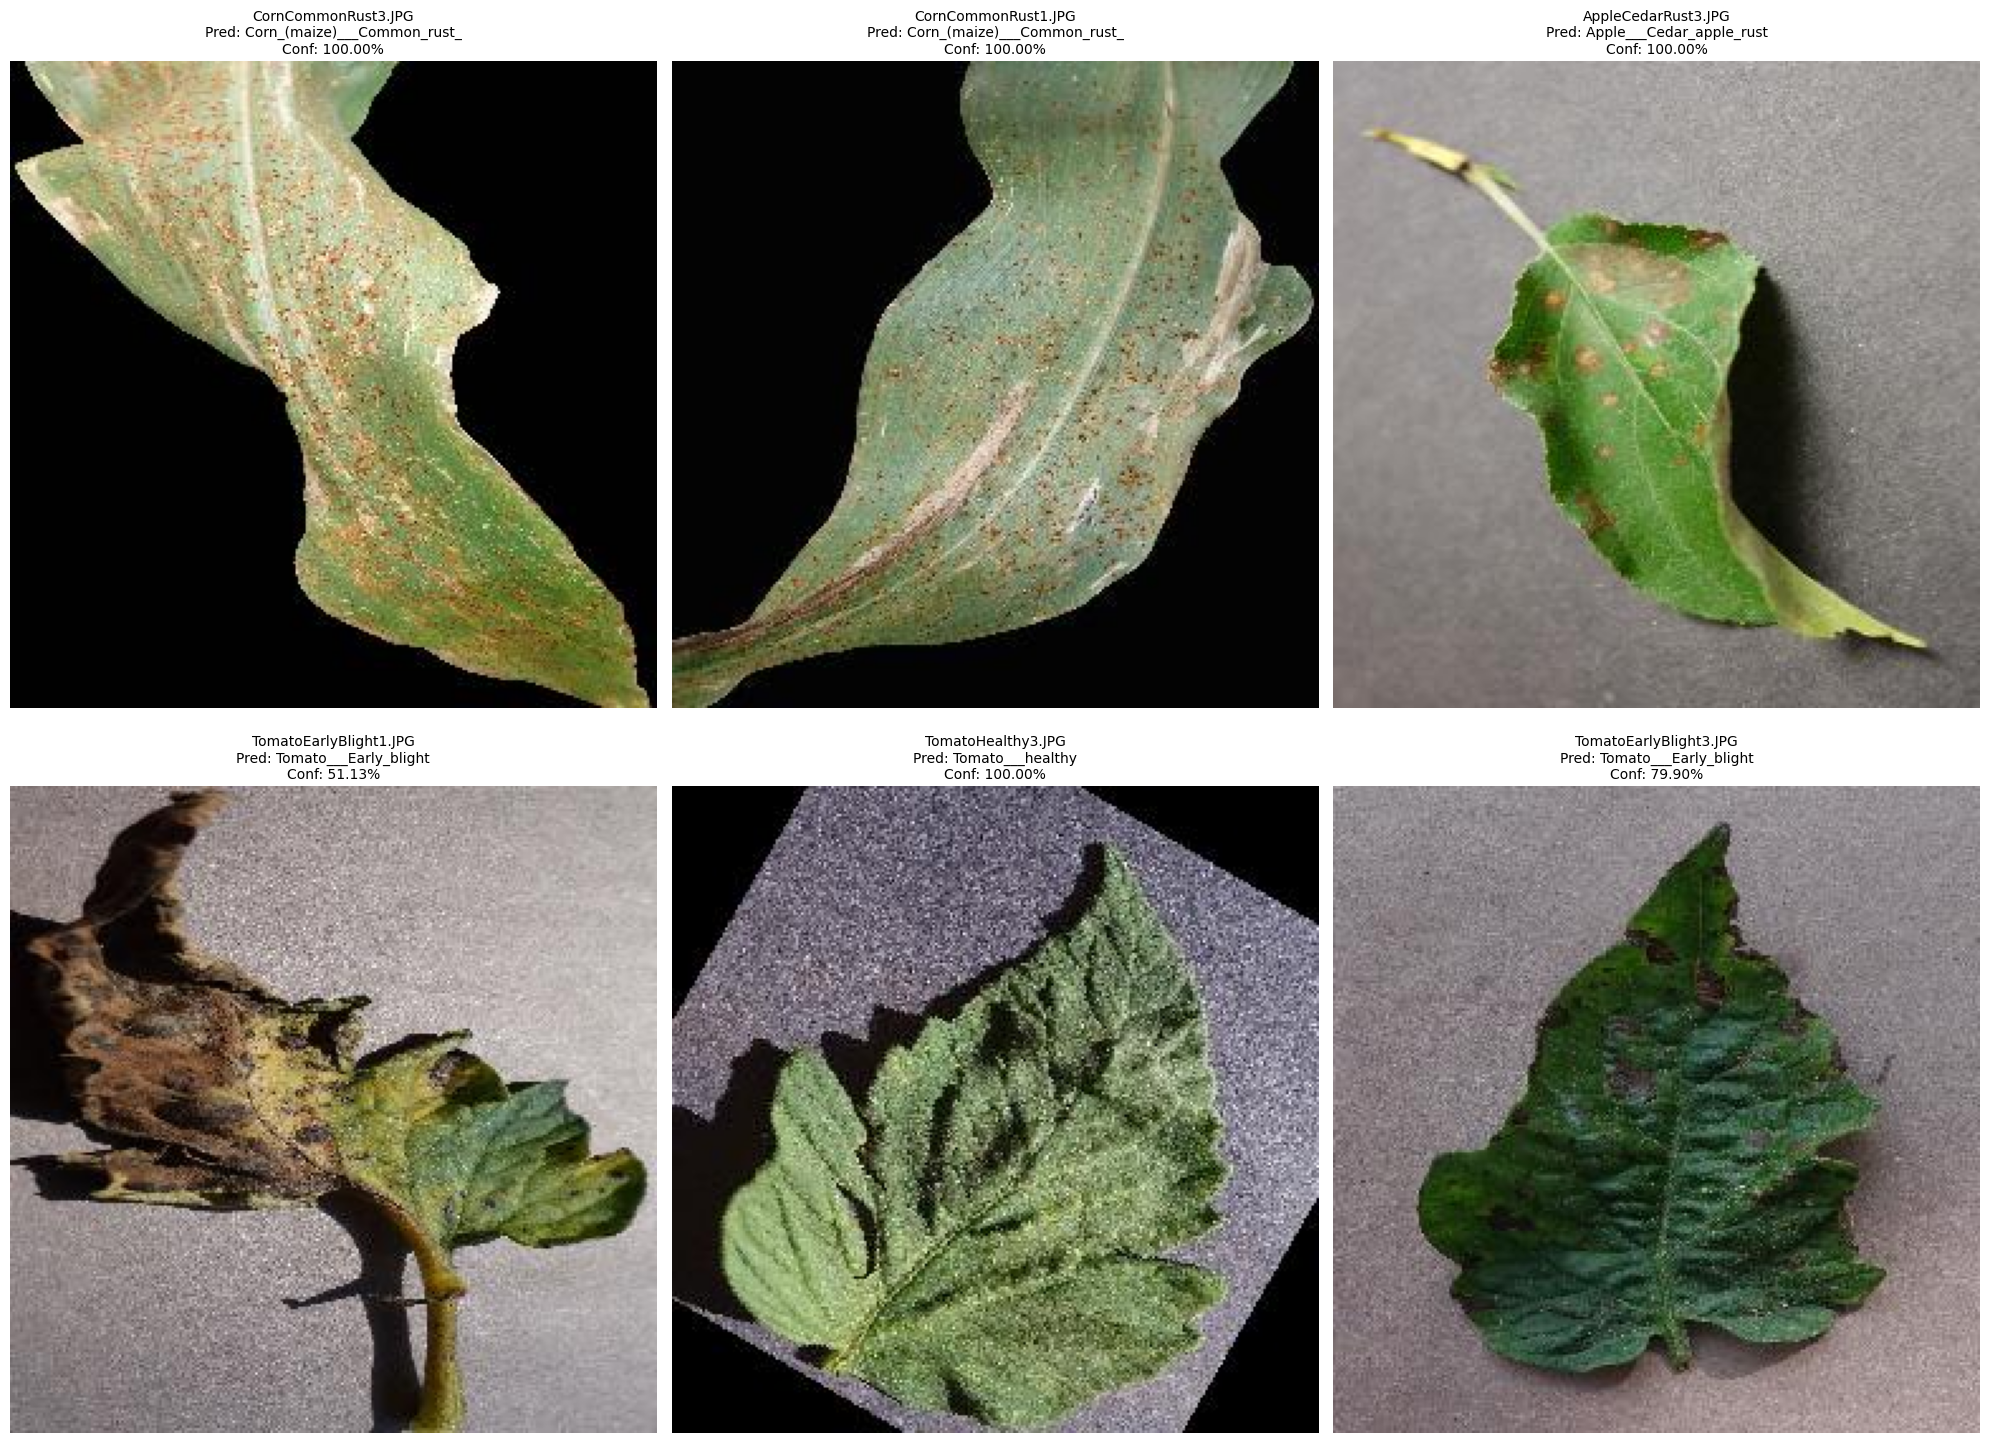


--- Saving Final Model ---
Model saved to: /content/drive/MyDrive/plant_disease_checkpoints/final_plant_disease_model.h5
Temporary directory cleaned up

EVALUATION SUMMARY
Validation Accuracy: 0.9519
Validation Loss: 0.1539
Number of test images processed: 30

Prediction Distribution:
Tomato___Early_blight: 6 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 6 images
Potato___Early_blight: 5 images
Apple___Cedar_apple_rust: 4 images
Tomato___healthy: 4 images
Corn_(maize)___Common_rust_: 3 images
Potato___healthy: 2 images


In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob
import shutil

# Step 1: Rebuild the model architecture
print("--- Rebuilding Model Architecture ---")
IMG_WIDTH, IMG_HEIGHT = 224, 224

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 2: Load the latest checkpoint weights
print("--- Loading Latest Checkpoint Weights ---")
checkpoint_dir = '/content/drive/MyDrive/plant_disease_checkpoints'
checkpoint_files = glob.glob(os.path.join(checkpoint_dir, 'model-*.weights.h5'))

if checkpoint_files:
    latest_checkpoint = max(checkpoint_files, key=os.path.getctime)
    print(f"Loading weights from: {latest_checkpoint}")
    model.load_weights(latest_checkpoint)
else:
    print("No checkpoint found! Please train the model first.")
    exit()

# Step 3: Set up data generators
print("--- Setting Up Data Generators ---")
valid_dir = '/content/pdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_images_dir = '/content/pdataset/test/test'

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Validation generator
validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
print(f"Validation images: {validation_generator.samples}")

# Step 4: Create a temporary test directory with proper structure
print("--- Creating Proper Test Directory Structure ---")
temp_test_dir = '/content/temp_test'
if os.path.exists(temp_test_dir):
    shutil.rmtree(temp_test_dir)
os.makedirs(temp_test_dir)

# Create a single 'test' class folder since we don't have true labels
test_class_dir = os.path.join(temp_test_dir, 'test')
os.makedirs(test_class_dir)

# Copy all test images to the temporary directory
test_images = [f for f in os.listdir(test_images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for img_file in test_images:
    src_path = os.path.join(test_images_dir, img_file)
    dst_path = os.path.join(test_class_dir, img_file)
    shutil.copy2(src_path, dst_path)

print(f"Copied {len(test_images)} test images to temporary directory")

# Test generator
test_generator = test_datagen.flow_from_directory(
    temp_test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
print(f"Test images: {test_generator.samples}")

# Step 5: Evaluate on validation set
print("--- Evaluating on Validation Set ---")
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Step 6: Since test images don't have true labels, we'll do individual predictions
print("\n--- Making Predictions on Test Images ---")

# Get class labels from training
train_dir = '/content/pdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
class_labels = list(train_generator.class_indices.keys())
print(f"Class labels: {class_labels}")

# Function to predict individual images
def predict_image(model, image_path, class_labels):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    predicted_label = class_labels[predicted_class]

    return predicted_label, confidence, predictions[0]

# Predict on all test images
print("\n--- Individual Test Image Predictions ---")
results = []
for img_file in test_images:
    img_path = os.path.join(test_images_dir, img_file)
    predicted_label, confidence, all_probs = predict_image(model, img_path, class_labels)

    results.append({
        'image': img_file,
        'predicted': predicted_label,
        'confidence': confidence
    })

    print(f"Image: {img_file}")
    print(f"Predicted: {predicted_label}")
    print(f"Confidence: {confidence:.2%}")
    print("-" * 50)

# Step 7: Display sample predictions with images (CORRECTED)
print("\n--- Visual Predictions ---")
def display_predictions(model, test_dir, class_labels, num_images=6):
    images = [f for f in os.listdir(test_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]  # Fixed: os.listdir

    plt.figure(figsize=(20, 15))
    for i, img_file in enumerate(images[:num_images]):
        img_path = os.path.join(test_dir, img_file)
        predicted_label, confidence, _ = predict_image(model, img_path, class_labels)

        plt.subplot(2, 3, i+1)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f'{img_file}\nPred: {predicted_label}\nConf: {confidence:.2%}', fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_predictions(model, test_images_dir, class_labels, num_images=6)

# Step 8: Save the final model
print("\n--- Saving Final Model ---")
model_save_path = '/content/drive/MyDrive/plant_disease_checkpoints/final_plant_disease_model.h5'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

# Step 9: Clean up temporary directory
shutil.rmtree(temp_test_dir)
print("Temporary directory cleaned up")

# Step 10: Display summary statistics
print("\n" + "="*70)
print("EVALUATION SUMMARY")
print("="*70)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Number of test images processed: {len(test_images)}")

# Count predictions by class
from collections import Counter
prediction_counts = Counter([result['predicted'] for result in results])
print("\nPrediction Distribution:")
for class_name, count in prediction_counts.most_common():
    print(f"{class_name}: {count} images")

print("="*70)

550/550 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step

--- Classification Report ---

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.89      0.93       504
                                 Apple___Black_rot       0.95      0.98      0.96       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.89      0.97      0.93       502
                               Blueberry___healthy       0.99      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.96      0.96       421
                 Cherry_(including_sour)___healthy       0.91      1.00      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.78      0.87       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
    

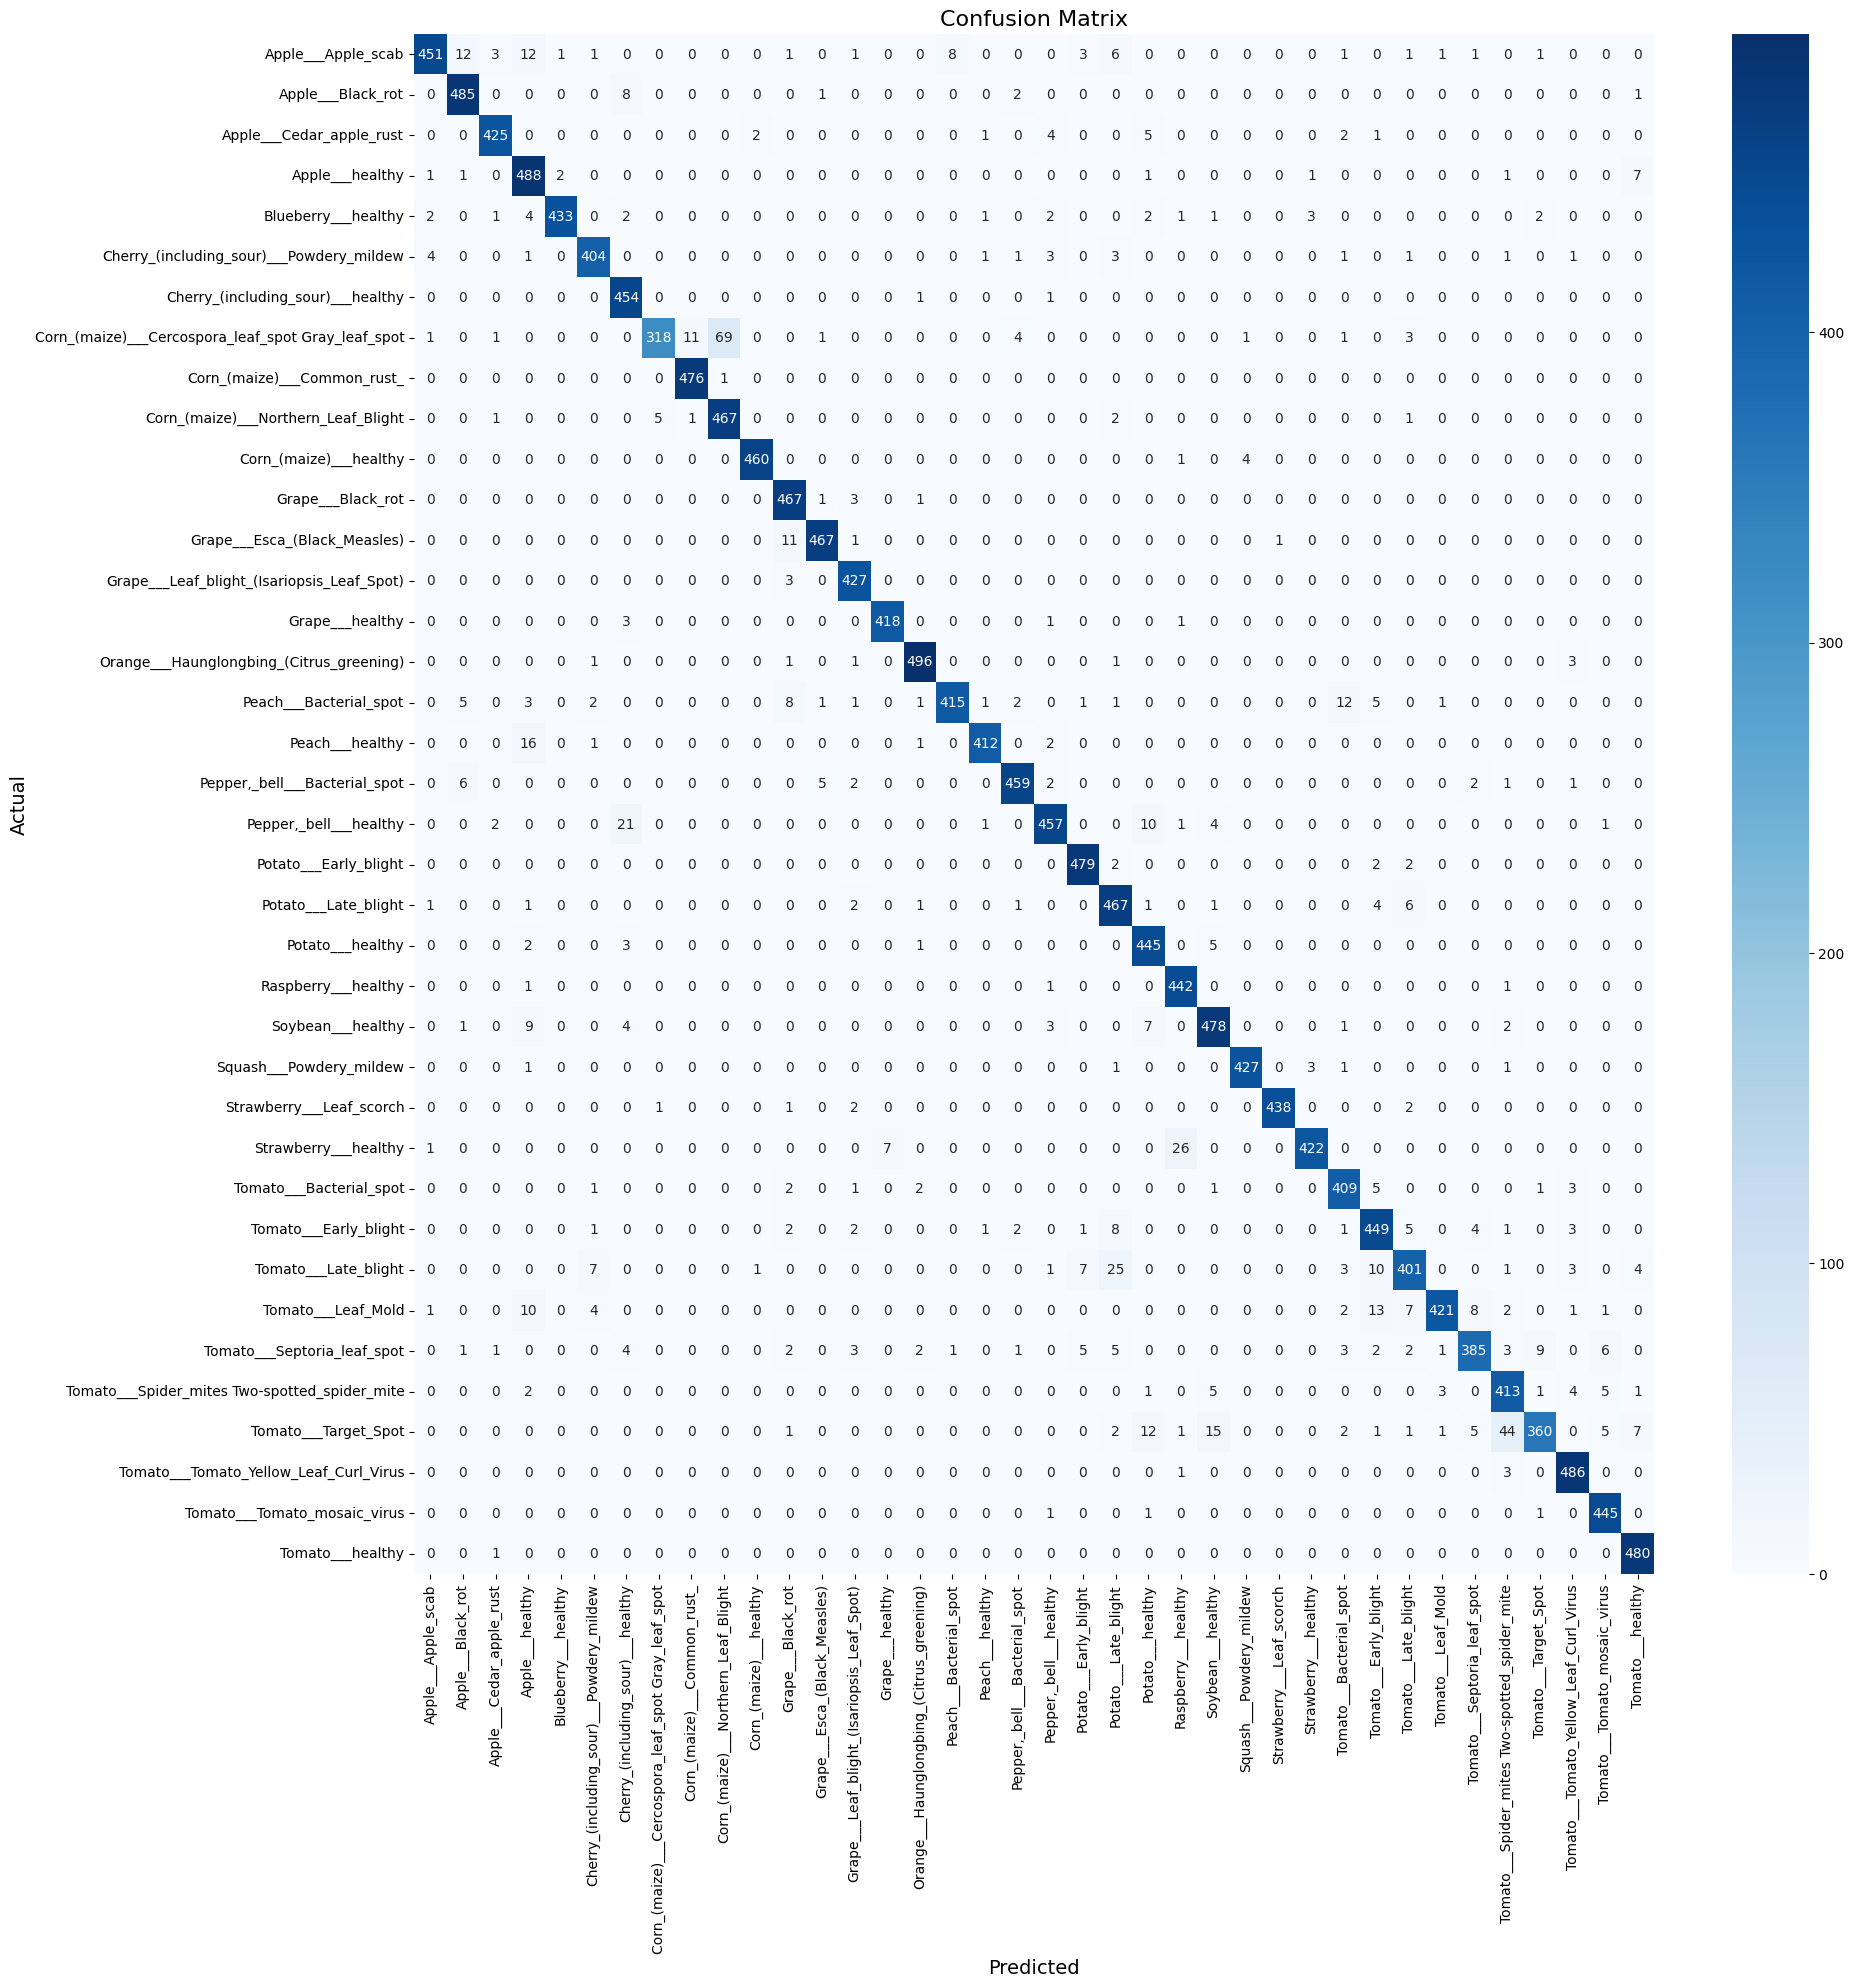

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Place this code after you've loaded your model and set up the validation_generator ---

# Get predictions for the entire validation set
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Get the class names
class_labels = list(validation_generator.class_indices.keys())

# 1. Print Classification Report
print("\n--- Classification Report ---\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# 2. Display Confusion Matrix
print("\n--- Confusion Matrix ---\n")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()